In [1]:
import numpy
import matplotlib
import matplotlib.pyplot as mp
import pandas
import mpl_toolkits
from mpl_toolkits import basemap
import matplotlib.cm as cm
import netCDF4
import time
import itertools
import datetime

degree_sign = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})
mp.rcParams['hatch.color'] = '0.5'

% matplotlib inline

In [2]:
class MidpointNormalize(matplotlib.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return numpy.ma.masked_array(numpy.interp(value, x, y))

In [3]:
# make color map
minval=0.05 # 
maxval=0.95 #
n=256
full_cmap = mp.get_cmap('RdBu')
cmap_partial = matplotlib.colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=full_cmap.name, a=minval, b=maxval), full_cmap(numpy.linspace(minval, maxval, n)))

In [4]:
SKIP_LONS = []#[120.,240.]
def format_every_other(lon):
    if lon in SKIP_LONS:
        return ''
    else:
        return '%3d' % lon + '\N{DEGREE SIGN}E' #r'${%3d\/^{\circ}\/E}$'%lon

In [5]:
whiplash_segments = numpy.array(( \
'1920-1950', \
'1950-1980', \
'1980-2010', \
'2010-2040', \
'2040-2070', \
'2070-2100', \
))

In [6]:
PRECT_lat = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lat.npy')
PRECT_lon = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lon.npy')

In [7]:
all_csv_data = []
for i in range(whiplash_segments.size):
    all_csv_data.append(pandas.read_csv('csv_files_ALL_TIME/store_all_whiplash_ratios_dataframe_8020_whole_domain_'+whiplash_segments[i]+'_windowsize_1.csv'))

all_wr_data_2d = []
for i in range(whiplash_segments.size):
    all_wr_data_2d.append( all_csv_data[i].values[:,1].reshape((26,25)) )

# 80-20 plots

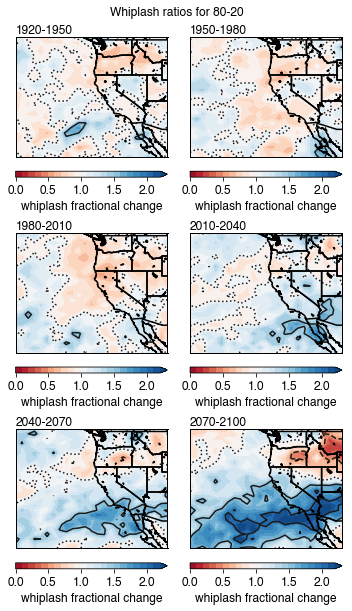

In [8]:
fontsize=12
contour_levels = numpy.arange(0,2.21,0.1)


fig = mp.figure(figsize=(5,8.5))

for i in range(whiplash_segments.size):
    ax = fig.add_subplot(3,2,i+1)
    map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=PRECT_lat.min(),urcrnrlat=PRECT_lat.max(),llcrnrlon=PRECT_lon.min(),urcrnrlon=PRECT_lon.max(),resolution='i')
    map.fillcontinents(color='0.75',lake_color='0.5')
    # draw parallels and meridians. # labels[left, right, top, bottom]
    #map.drawparallels(numpy.arange(-80.,81.,5.), labels=[1,0,0,0], dashes=[3,2], fontsize=fontsize, color='0')
    #map.drawmeridians(numpy.arange(-180.,181.,10.), labels=[0,0,0,1], dashes=[3,2], fmt=format_every_other, fontsize=fontsize, color='0')
    map.drawmapboundary(fill_color='0')

    map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
    #map.drawmapboundary(linewidth=1, color='0.5', zorder=3)
    map.drawstates(linewidth=1.5, color='0', zorder=3)
    map.drawcountries(linewidth=1.5, color='0', zorder=3)

    lons,lats = numpy.meshgrid(PRECT_lon, PRECT_lat)
    xi,yi = map(lons, lats)

    pr_map = map.contourf(xi, yi, all_wr_data_2d[i], cmap=cmap_partial, zorder=2, norm=MidpointNormalize(midpoint=1.0), levels=contour_levels, extend='max', latlon=True)
    pr_contours = map.contour(xi, yi, all_wr_data_2d[i], levels=[0.5,1.0,1.5,2.0], colors='0.1', alpha=1, linewidth=[1,1,1,1], linestyles=['--',':','-','-'])

    divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
    cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
    #cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal', extend='max')
    cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

    cbar.set_label('whiplash fractional change', fontsize=fontsize)
    cbar.ax.tick_params(labelsize=fontsize)
    cbar.set_ticks([0,0.5,1.,1.5,2.])
    
    ax.text(s=whiplash_segments[i], x=0, y=1.01, transform=ax.transAxes, fontsize=fontsize, ha='left', va='bottom')

    fig.tight_layout()

fig.text(s='Whiplash ratios for 80-20', x=0.5, y=0.98, ha='center', va='bottom', fontsize=fontsize, transform=fig.transFigure)
mp.savefig('SIMPLE_whiplash_ratios_8020_all_segments.pdf', transparent=True, bbox_inches='tight')

In [9]:
csv_data = pandas.read_csv('csv_files_ALL_TIME/store_all_whiplash_ratios_dataframe_8020_whole_domain_2070-2100_windowsize_1.csv')
wr_data_2d_2070_2100 = csv_data.values[:,1].reshape((26,25))

# 80-20 plots for 2070-2100

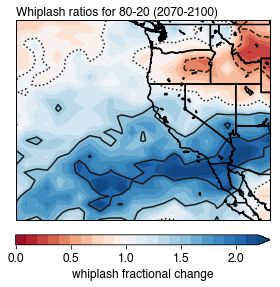

In [10]:
fontsize=12
contour_levels = numpy.arange(0,2.21,0.1)


fig = mp.figure(figsize=(4,4))

ax = fig.add_subplot(111)
map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=PRECT_lat.min(),urcrnrlat=PRECT_lat.max(),llcrnrlon=PRECT_lon.min(),urcrnrlon=PRECT_lon.max(),resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(PRECT_lon, PRECT_lat)
xi,yi = map(lons, lats)

pr_map = map.contourf(xi, yi, wr_data_2d_2070_2100, cmap=cmap_partial, zorder=2, norm=MidpointNormalize(midpoint=1.0), levels=contour_levels, extend='max', latlon=True)
pr_contours = map.contour(xi, yi, wr_data_2d_2070_2100, levels=[0.5,1.0,1.5,2.0], colors='0.1', alpha=1, linewidth=[1,1,1,1], linestyles=['--',':','-','-'])

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('whiplash fractional change', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_ticks([0,0.5,1.,1.5,2.])

ax.text(s='Whiplash ratios for 80-20 (2070-2100)', x=0, y=1.01, transform=ax.transAxes, fontsize=fontsize, ha='left', va='bottom')

fig.tight_layout()

#fig.text(s='Whiplash ratios for 80-20', x=0.5, y=0.98, ha='center', va='bottom', fontsize=fontsize, transform=fig.transFigure)
mp.savefig('SIMPLE_whiplash_ratios_8020_2070-2100.pdf', transparent=True, bbox_inches='tight')

# 80-20 plots (2003/2017/2042)

In [11]:
csv_data = pandas.read_csv('csv_files_ALL_TIME/store_all_whiplash_ratios_dataframe_8020_whole_domain_2003-2033_windowsize_1.csv')
wr_data_2d_2003_2033 = csv_data.values[:,1].reshape((26,25))

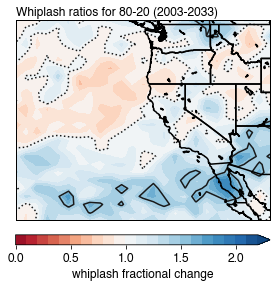

In [12]:
fontsize=12
contour_levels = numpy.arange(0,2.21,0.1)


fig = mp.figure(figsize=(4,4))

ax = fig.add_subplot(111)
map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=PRECT_lat.min(),urcrnrlat=PRECT_lat.max(),llcrnrlon=PRECT_lon.min(),urcrnrlon=PRECT_lon.max(),resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(PRECT_lon, PRECT_lat)
xi,yi = map(lons, lats)

pr_map = map.contourf(xi, yi, wr_data_2d_2003_2033, cmap=cmap_partial, zorder=2, norm=MidpointNormalize(midpoint=1.0), levels=contour_levels, extend='max', latlon=True)
pr_contours = map.contour(xi, yi, wr_data_2d_2003_2033, levels=[0.5,1.0,1.5,2.0], colors='0.1', alpha=1, linewidth=[1,1,1,1], linestyles=['--',':','-','-'])

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('whiplash fractional change', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_ticks([0,0.5,1.,1.5,2.])

ax.text(s='Whiplash ratios for 80-20 (2003-2033)', x=0, y=1.01, transform=ax.transAxes, fontsize=fontsize, ha='left', va='bottom')

fig.tight_layout()

#fig.text(s='Whiplash ratios for 80-20', x=0.5, y=0.98, ha='center', va='bottom', fontsize=fontsize, transform=fig.transFigure)
mp.savefig('SIMPLE_whiplash_ratios_8020_2003-2033.pdf', transparent=True, bbox_inches='tight')

# Save as netcdf file

In [13]:
# save hist clim
filename = 'whiplash_ratios_8020.nc'

ncfile = netCDF4.Dataset(filename, 'w', format='NETCDF4')

lat_dim = ncfile.createDimension('lat', PRECT_lat.size)
lon_dim = ncfile.createDimension('lon', PRECT_lon.size)

lat_var = ncfile.createVariable('lat', 'f4', ('lat',))
lon_var = ncfile.createVariable('lon', 'f4', ('lon',))
lat_var[:] = PRECT_lat
lon_var[:] = PRECT_lon
lat_var.units = 'degrees_north'
lon_var.units = 'degrees_east'

return_values_pic = ncfile.createVariable('wr_2070_2100', 'f4', ('lat','lon'))
return_values_pic[:] = wr_data_2d_2070_2100
return_values_pic.units = 'unitless'
return_values_pic.description = 'Ratio of simple whiplash events (one dry year, one wet year, centered on 2085)'

ratios_of_frequencies = ncfile.createVariable('wr_2003_2033', 'f4', ('lat','lon'))
ratios_of_frequencies[:] = wr_data_2d_2003_2033
ratios_of_frequencies.units = 'unitless'
ratios_of_frequencies.description = 'Ratio of simple whiplash events (one dry year, one wet year, centered on 2017)'

ncfile.history = 'Created ' + time.ctime(time.time())
ncfile.close()
print(filename, "saved")

whiplash_ratios_8020.nc saved


In [14]:
LA_lat = 34.0522
LA_lon = 118.2437 # deg west
LA_lon = 180. + (180-LA_lon)

Oroville_dam_lat = 39.5380
Oroville_dam_lon = 121.4831 # deg west
Oroville_dam_lon = 360 - Oroville_dam_lon

SF_lat = 37.7749
SF_lon = 122.4194
SF_lon = 360 - SF_lon

In [15]:
cali_coast_latlon_indices = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/coastal_latlon_array_indices_3x.npy')
cali_coast_latlon_indices_zip = [i for i in zip(cali_coast_latlon_indices[:,0], cali_coast_latlon_indices[:,1])]

cali_coast_latlon_indices_3d = cali_coast_latlon_indices.reshape((11,3,2))
#print(cali_coast_latlon_indices_3d[0,:,:])

In [16]:
PRECT_nlat = 26
PRECT_nlon = 25

latlon_indices = list(itertools.product(range(PRECT_nlat), range(PRECT_nlon)))
region = 'whole_domain'
window=1

In [17]:
csv_data = pandas.read_csv('csv_files_ALL_TIME/store_all_whiplash_ratios_dataframe_8020_whole_domain_2003-2033_windowsize_1.csv')
wr_data_2d_2003_2033 = csv_data.values[:,1].reshape((PRECT_nlat,PRECT_nlon))

In [18]:
year_start_list = numpy.arange(1920,2071)
year_end_list = numpy.arange(1950,2101)
year_middle_list = year_start_list[:-1]+15

season_strings_list = [str(year_start_list[i])+'-'+str(year_end_list[i]) for i in range(year_start_list.size-1)]

In [19]:
all_wr_data_2d = numpy.zeros((len(season_strings_list),PRECT_nlat,PRECT_nlon))
for s in range(len(season_strings_list)):
    csv_data = pandas.read_csv('csv_files_ALL_TIME/store_all_whiplash_ratios_dataframe_8020_whole_domain_'+season_strings_list[s]+'_windowsize_1.csv')
    csv_data = csv_data.values[:,1].reshape((PRECT_nlat,PRECT_nlon))
    all_wr_data_2d[s,:,:] = csv_data

In [20]:
all_wr_data_2d_cali_coast = all_wr_data_2d[:,cali_coast_latlon_indices[:,0],cali_coast_latlon_indices[:,1]]
all_wr_data_2d_cali_coast = numpy.reshape(all_wr_data_2d_cali_coast, (-1,11,3))
all_wr_data_cali_coast_latmean = numpy.mean(all_wr_data_2d_cali_coast, axis=2).T

In [21]:
print(all_wr_data_cali_coast_latmean.shape)
print(year_middle_list.shape)

(11, 150)
(150,)


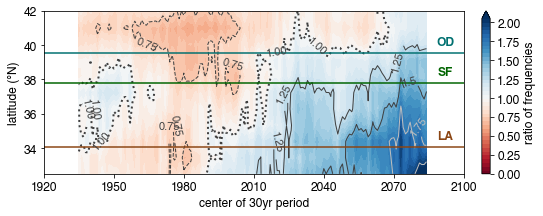

In [22]:
fontsize=12

fig = mp.figure(figsize=(8,3))

ax = fig.add_subplot(111)

contour_levels = numpy.arange(0,2.1,0.05)

ax_cf = ax.contourf(year_middle_list, \
                    PRECT_lat[numpy.unique(cali_coast_latlon_indices[:,0])], \
                    all_wr_data_cali_coast_latmean, \
                    norm=MidpointNormalize(midpoint=1.0), \
                    cmap='RdBu', \
                    levels=contour_levels, \
                    extend='max')

# ax_sig = ax.contourf(year_middle_list, \
#                     PRECT_lat[numpy.unique(cali_coast_latlon_indices[:,0])], \
#                     sig_test_values, \
#                     #count_ratio_2d_cali_bool, \
#                     colors='None', \
#                     #levels=[0.0,0.05,1.0], \
#                     levels=[0.5,1.5], \
#                     hatches=['...'], \
#                     extend='lower', \
#                     edgecolors='red', \
#                     zorder=2)

ax_c = ax.contour(year_middle_list, \
                    PRECT_lat[numpy.unique(cali_coast_latlon_indices[:,0])], \
                    all_wr_data_cali_coast_latmean, \
                    norm=MidpointNormalize(midpoint=1.0), \
                    levels=[0,0.25,0.5,0.75,1,1.25,1.5,1.75,2], \
                    colors=['0.25']*7+['0.75']*2, \
                    linestyles=['--']*4+[':']+['-']*4, \
                    linewidths=[1]*4+[2]+[1]*4, \
                    zorder=1)

new_levels = []
for i in ax_c.levels:
    if i in [0.5,1.5]:
        new_levels.append('{:.1f}'.format(i))
    else:
        new_levels.append('{:.2f}'.format(i))
ax_c.levels = new_levels
mp.clabel(ax_c, fontsize=fontsize-1, colors=['0.25']*7+['0.75']*2)

la_color = 'saddlebrown'
sf_color = 'darkgreen'
od_color = '#007070' # '#008080' is teal

#ax.axhline(LA_lat, c='firebrick', zorder=1)
ax.axhline(LA_lat, c=la_color, zorder=2)
ax.axhline(SF_lat, c=sf_color, zorder=2)
ax.axhline(Oroville_dam_lat, c=od_color, zorder=2)

ax.text(s='LA', zorder=3, x=2092, y=LA_lat+0.3, color=la_color, ha='center', va='bottom', fontsize=fontsize, weight='bold')
ax.text(s='SF', zorder=3, x=2092, y=SF_lat+0.3, color=sf_color, ha='center', va='bottom', fontsize=fontsize, weight='bold')
ax.text(s='OD', zorder=3, x=2092, y=Oroville_dam_lat+0.3, color=od_color, ha='center', va='bottom', fontsize=fontsize, weight='bold')

ax.set_xlim(1920,2100)
ax.set_xticks(numpy.arange(1920,2101,30))
ax.set_yticks(numpy.arange(34,43,2))

ax.tick_params(labelsize=fontsize)

ax.set_ylabel('latitude ('+degree_sign+'N)', fontsize=fontsize)
ax.set_xlabel('center of 30yr period', fontsize=fontsize)

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('right', size='2%', pad=0.25) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
cbar = fig.colorbar(ax_cf, cax=cbar_ax, orientation='vertical')
cbar.set_label('ratio of frequencies', fontsize=fontsize)#, labelpad=10)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_ticks([0,0.25,0.5,0.75,1,1.25,1.5,1.75,2])

#cf = mp.contourf(year_middle_list, PRECT_lat[numpy.unique(cali_coast_latlon_indices[:,0])], count_ratio_2d_cali)
#mp.colorbar(cf)

fig.savefig('time_latitude_plot.pdf', transparent=True, bbox_inches='tight')

In [23]:
PRECT_lat_subset = PRECT_lat[numpy.unique(cali_coast_latlon_indices[:,0])]

In [24]:
# convert times

time_datetime = [datetime.datetime(i,1,15) for i in year_middle_list]
time_nc = netCDF4.date2num(time_datetime, units='days since 1920-01-01', calendar='standard')

In [25]:
# save hist clim
filename = 'time_latitude_whiplash_ratios_8020.nc'

ncfile = netCDF4.Dataset(filename, 'w', format='NETCDF4')

lat_dim = ncfile.createDimension('lat', PRECT_lat_subset.size)
time_dim = ncfile.createDimension('time', len(year_middle_list))

lat_var = ncfile.createVariable('lat', 'f4', ('lat',))
time_var = ncfile.createVariable('time', 'f4', ('time',))
lat_var[:] = PRECT_lat_subset
time_var[:] = time_nc
lat_var.units = 'degrees_north'
time_var.units = 'days since 1920-01-01'
time_var.description = 'Each year is centered on the 30 years surrounding it'

ratios_of_frequencies = ncfile.createVariable('time_lat_ratios', 'f4', ('lat','time'))
ratios_of_frequencies[:] = all_wr_data_cali_coast_latmean
ratios_of_frequencies.units = 'unitless'
ratios_of_frequencies.description = 'Ratio of frequencies of whiplash events for California grid points (average of 3 grid points for each latitude)'

ncfile.history = 'Created ' + time.ctime(time.time())
ncfile.close()
print(filename, "saved")

time_latitude_whiplash_ratios_8020.nc saved
